# CC3001 Otoño 2023 Tarea 4
# Generación de código

Profesores: Iván Sipirán / Nelson Baloian / Patricio Poblete


El objetivo de esta tarea es aprender sobre la manipulación de árboles que representan fórmulas. Hay muchas cosas que uno puede hacer con estos árboles, y en esta tarea nos enfocaremos en particular en algo que los compiladores hacen: la **generación de código** para evaluar fórmulas.

Específicamente, el problema es: dada una fórmula, generar una secuencia de instrucciones elementales que la evalúen. Por ejemplo, dada una fórmula como

```
(a+b)*(c-d)
```

se podría generar código como el siguiente:

```
t1=a+b
t2=c-d
t3=t1*t2
```

Las instrucciones elementales son siempre de la forma ``ti=x op y``, donde ``ti`` es una variable temporal, ``x`` e ``y`` pueden ser variables o números, y ``op`` es un operador. Uno va creando variables ``t1``, ``t2``, ... a medida que las necesita, y la última de ellas es la que almacena el valor final de la fórmula.

Las fórmulas pueden ser arbitrariamente complicadas, como por ejemplo la fórmula

$$
(2-p\,q)\left( \frac{1}{n}+\frac{1}{p+q}\right)
$$

la cual escribimos como

```
(2-p*q)*(1/n+1/(p+q))
```

y cuyo código generado podría ser,

```
t1=p*q
t2=2-t1
t3=1/n
t4=p+q
t5=1/t4
t6=t3+t5
t7=t2*t6
```

El objetivo de esta tarea es que usted implemente una función que, dado un árbol ya construído, lo recorra para generar una secuencia de instrucciones elementales que lo evalúe.

A continuación usted encontrará clases ``Nodoi``, ``Nodoe`` y ``Arbol`` que implementan árboles que representan fórmulas. La clase ``Arbol`` viene con un constructor que recibe un string como parámetro, el cual contiene una fórmula, y este constructor se encarga de transformar la fórmula de string a árbol, de modo que usted no necesita preocuparse de eso. Para simplificar, la fórmula solo podrá contener variables de una sola letra, números de un solo dígito, y sin espacios. Los operadores permitidos son solo suma, resta, multiplicación y división. No hay operador menos unario.

Usted tienen que implementar para la clase ``Arbol`` una función ``codigo`` que al ser invocado genere una secuencia de instrucciones elementales para evaluar la fórmula representada por ese árbol, y la retorne en forma de una lista (de Python).

In [ ]:
# Ejecutar esto para poder visualizar los árboles

!pip install aed-utilities

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import aed_utilities as aed
t=[] #Inicializamos lista que luego usaremos de forma global para almacenar los t_i

class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der
    def codigo(self):
      global t #Traemos la lista global
      if isinstance(self.izq,Nodoi) and isinstance(self.der,Nodoe): #nodo izq Nodoi - nodo der Nodoe
        self.izq.codigo() #Vemos el nodo izquierdo ya que es Nodoi y se puede seguir ramificando y agregando información, el nodo der por ser Nodoe extraeremos su self.info también con codigo()
      elif isinstance(self.izq,Nodoe) and isinstance(self.der,Nodoi): #nodo izq Nodoe - nodo der Nodoi
        self.der.codigo() #Caso analogo pero por la derecha
      else: #los 2 son Nodoi ----> se analizan ambos
        self.izq.codigo()
        self.der.codigo()

      aux= self.izq.info+self.info+self.der.info
      indice = len(t) + 1 #El largo de la lista + 1 es quien nos da la idea de a que t_i nos corresponde guardar appendiando en nuestra lista global. EJ: [a+b,c-d] tiene largo 2, luego sigue appendear t_2+1 = t[1]*t[2]
      self.info="t{}".format(indice) #actualizamos el self.info
      t.append("t{}".format(indice)+"= "+aux) #al str t le agrega dentro de las {} con format el indice correspondiente

class Nodoe:
    def __init__(self, info):
        self.info=info
    def codigo(self):
      return self.info #Retorna los valores self.info de los NodosE, también sirve para desenrollar la recursión

class Arbol:
    def __init__(self,formula):
        global k
        global s
        s=formula+";" # agregamos una marca de fin de la entrada
        k=0 # indica próximo caracter por procesar
        # definimos funciones para analizar la fórmula
        def expresion(): # retorna puntero a la raíz de un árbol que representa a la fórmula s
            global k
            global s
            a=factor()
            while s[k]=="+" or s[k]=="-":
                op=s[k]
                k+=1
                b=factor()
                a=Nodoi(a,op,b)
            return a
        def factor():
            global k
            global s
            a=termino()
            while s[k]=="*" or s[k]=="/":
                op=s[k]
                k+=1
                b=termino()
                a=Nodoi(a,op,b)
            return a
        def termino(): # posible constante, variable o formula parentizada
            global k
            global s
            if s[k].isalpha() or s[k].isdigit():
                a=Nodoe(s[k])
                k+=1
                return a
            if s[k]=="(": # fórmula parentizada
                k+=1
                a=expresion()
                if s[k]!=")":
                    print("Error: Falta cierra paréntesis: "+formula[k:])
                    assert False
                k+=1
                return a
            print("Error: Falta variable, número o abre paréntesis: "+formula[k:])
            assert False
        a=expresion()
        if s[k]!=";":
            print("Error: Basura al final de la fórmula: "+formula[k:])
            assert False

        self.raiz=a

    def codigo(self):
        # Esta es la función que tienen que escribir ustedes

        #Usaremos isinstance() para saber si es Nodoe: debe ser un num o variable (en el fondo un valor), o si es Nodoi: un operador
        global t
        if isinstance(self.raiz, Nodoe): #Caso especial/borde para arboles de solo variable/valor del tipo: t1=a
          #Sabiendo que estamos en un Nodoe, solo nos queda retornar su valor, para casos de formulas de al menos un x op y, internamente en el caso siguiente se retornara el valor
          indice = len (t) + 1
          t.append("t{}".format(indice)+"= "+self.raiz.info)
          return t
        elif isinstance(self.raiz, Nodoi):
          self.raiz.codigo() #Siendo Nodoi lo operaremos todo internamente en la funcion codigo propia de los nodos

        #print(t) #Printear t si se quiere ver como esta devolviendo la lista
        return t #Codigo tiene que retornar la lista con los ti usados, ej return [t1,t2,t3,t4]

    def dibujar(self):
      btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der", classNone=Nodoe)
      btd.draw_tree(self, "raiz")



A continuación probamos esta funcionalidad con varias fórmulas de ejemplo. Para ver si el árbol fue construido correctamente, lo dibujamos.

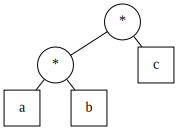

In [ ]:
Arbol("a*b*c").dibujar()

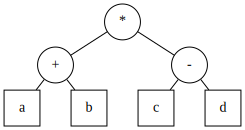

In [ ]:
Arbol("(a+b)*(c-d)").dibujar()

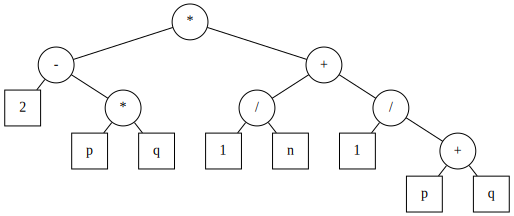

In [ ]:
Arbol("(2-p*q)*(1/n+1/(p+q))").dibujar()

## Resultados

En esta sección probamos la generación de código que usted tiene que escribir. Mientras usted no sustituya la función ``codigo`` provisoria que viene en la definición de la clase, va a aparecer la lista que generamos ahí. Primero vamos a definir una función ``probar`` que genera el código a partir de una fórmula dada e imprime el resultado:

In [ ]:
def probar(formula):
    a=Arbol(formula)
    global t
    t=[]
    for x in a.codigo(): #x in [t1=a+b,t2=c-d,t3=t1*t2]
        print(x)

A continuación probamos con varias fórmulas. Además de las fórmulas dadaas, usted tiene que agregar tres ejemplos adicionales.

In [ ]:
probar("a+1")

t1= a+1


In [ ]:
probar("(a+b)*(c-d)")
#me puede estar faltando un caso base en codigo porque el * del nodo raiz lo toma mal (da lo mismo el tipo de operador)
#DETECTADO LO DE ARRIBA: pasa por el append de codigo() dentro del arbol

t1= a+b
t2= c-d
t3= t1*t2


In [ ]:
probar("(2-p*q)*(1/n+1/(p+q))")

t1= p*q
t2= 2-t1
t3= 1/n
t4= p+q
t5= 1/t4
t6= t3+t5
t7= t2*t6


In [ ]:
probar("((((a+b)+c)+d)+e)")

t1= a+b
t2= t1+c
t3= t2+d
t4= t3+e


In [ ]:
probar("(a+(b+(c+(d+e))))")

t1= d+e
t2= c+t1
t3= b+t2
t4= a+t3


In [ ]:
probar("a")

t1= a


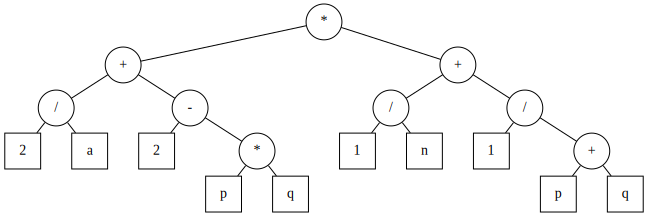

t1= 2/a
t2= p*q
t3= 2-t2
t4= t1+t3
t5= 1/n
t6= p+q
t7= 1/t6
t8= t5+t7
t9= t4*t8


In [ ]:
#Ejemplo adicional 1:
Arbol("(2/a+(2-p*q))*(1/n+1/(p+q))").dibujar()
probar("(2/a+(2-p*q))*(1/n+1/(p+q))")

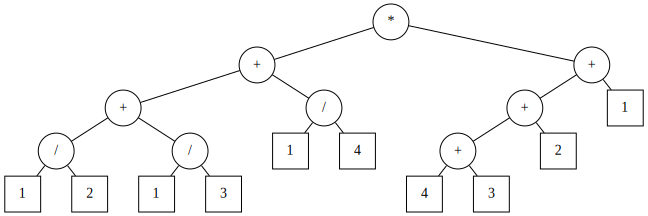

t1= 1/2
t2= 1/3
t3= t1+t2
t4= 1/4
t5= t3+t4
t6= 4+3
t7= t6+2
t8= t7+1
t9= t5*t8


In [ ]:
#Ejemplo adicional 2:
Arbol("(((1/2)+(1/3)+(1/4))*(4+3+2+1))").dibujar()
probar("(((1/2)+(1/3)+(1/4))*(4+3+2+1))")

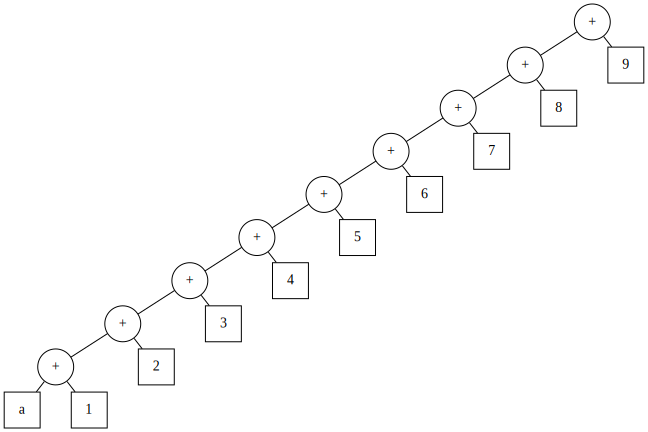

t1= a+1
t2= t1+2
t3= t2+3
t4= t3+4
t5= t4+5
t6= t5+6
t7= t6+7
t8= t7+8
t9= t8+9


In [ ]:
#Ejemplo adicional 3:
Arbol("a+1+2+3+4+5+6+7+8+9").dibujar()
probar("a+1+2+3+4+5+6+7+8+9")
#agrupando a+1 luego efectivamente realiza 9 operaciones involucrando sumas

## Para los que quieran aprender más (opcional)

Suponga que hay escasez de variables temporales, así que se le ha pedido que trate de reciclarlas lo más posible, y solo crear nuevas variables ``ti`` cuando sea estrictamente necesario. Por ejemplo, para la fórmula

```
((a+b)*c)+((d-e)/f)
```

si generamos código como lo hemos hecho en los ejemplos anteriores (código de la izquierda), se usan 5 variables temporales, pero el código de la derecha muestra que se puede evaluar usando solo 2:

```
t1=a+b               t1=a+b
t2=t1+c              t1=t1*c
t3=d-e               t2=d-e
t4=t3/f              t2=t2/f
t5=t2+t4             t1=t1+t2
```

Piense cómo se podría modificar su algoritmo para que use el mínimo posible de variables temporales.

No es necesario que implemente nada, solo que considere cómo se podría hacer. Si se le ocurre algo interesante, puede escribirlo al final de su tarea, pero no es obligatorio ni influye en la nota. ¡La satisfacción de poder resolver el problema es su propia recompensa!